In [82]:
# Import the pandas library for data manipulation

import pandas as pd 

# Loading the datasets into individual dataframes from CSV files
crime_data_2019 = pd.read_csv('Crime_Data_2019_(Part_1_Offenses).csv')
crime_data_2020 = pd.read_csv('Crime_Data_2020_(Part_1_Offenses).csv')
crime_data_2021 = pd.read_csv('Crime_Data_2021_(Part_1_Offenses).csv')
crime_data_2022 = pd.read_csv('Crime_Data_2022_(Part_1_Offenses).csv')

# Remove the 'Attempt' column from the 2020 crime dataset
crime_data_2020 = crime_data_2020.drop(columns=['Attempt'])

# Define standard column names for uniformity across datasets
standard_columns = ['CRIME DATE', 'TIME START', 'TIME END', 'ADDRESS', 'CRIME TYPE', 'ARREST MADE', 'LARCENY TYPE', 'ID']

# Rename columns in each dataset to standardize them
crime_data_2019.columns = standard_columns
crime_data_2020.columns = standard_columns
crime_data_2021.columns = standard_columns
crime_data_2022.columns = standard_columns

# Merge all dataframes into one combined DataFrame
all_crime_data = pd.concat([crime_data_2019, crime_data_2020, crime_data_2021, crime_data_2022], axis=0, ignore_index=True)

# Replace NaN values in 'ARREST MADE' column with 'No'
all_crime_data['ARREST MADE'] = all_crime_data['ARREST MADE'].fillna('No')

# Convert 'CRIME DATE' to datetime format and then extract just the date part
all_crime_data['CRIME DATE'] = pd.to_datetime(all_crime_data['CRIME DATE']).dt.date

# Function to convert time in HHMM format to a time object
def convert_to_time(hhmm):
    try:
        if pd.notna(hhmm):
            hhmm_str = f"{int(hhmm):04d}"  # Format as a four-digit string
            return pd.to_datetime(hhmm_str, format='%H%M').time()
    except ValueError:
        # Return None if conversion is not possible
        return None
    return None

# Apply the time conversion function to 'TIME START' and 'TIME END'
all_crime_data['TIME START'] = all_crime_data['TIME START'].apply(convert_to_time)
all_crime_data['TIME END'] = all_crime_data['TIME END'].apply(convert_to_time)

# Write the combined dataframe to a CSV file without the index
all_crime_data.to_csv('All_Crime_Data.csv', index=False)

In [83]:
# Inspecting the first few rows of the dataframe
print(all_crime_data.head())

   CRIME DATE TIME START  TIME END                 ADDRESS  \
0  2019-01-01   01:20:00  01:24:00  100 BALLANTYNE RD        
1  2019-01-01   18:19:00  07:00:00       100 DAWES AV        
2  2019-01-01   01:15:00  02:45:00      100 FENTON ST        
3  2019-01-01   19:00:00  19:00:00     100 MILDRED AV        
4  2019-01-01   07:25:00  07:25:00    1400 MIDLAND AV        

           CRIME TYPE ARREST MADE   LARCENY TYPE  ID  
0  AGGRAVATED ASSAULT         Yes            NaN   1  
1             LARCENY          No      All Other   2  
2            MV THEFT          No  Motor Vehicle   3  
3  AGGRAVATED ASSAULT         Yes            NaN   4  
4  AGGRAVATED ASSAULT          No            NaN   5  


In [84]:
# Check data types validations of all columns
print(all_crime_data.dtypes)

# Convert data types if necessary
# For example, if 'CRIME DATE' is not in datetime format, convert it:
all_crime_data['CRIME DATE'] = pd.to_datetime(all_crime_data['CRIME DATE'], errors='coerce')

CRIME DATE      object
TIME START      object
TIME END        object
ADDRESS         object
CRIME TYPE      object
ARREST MADE     object
LARCENY TYPE    object
ID               int64
dtype: object


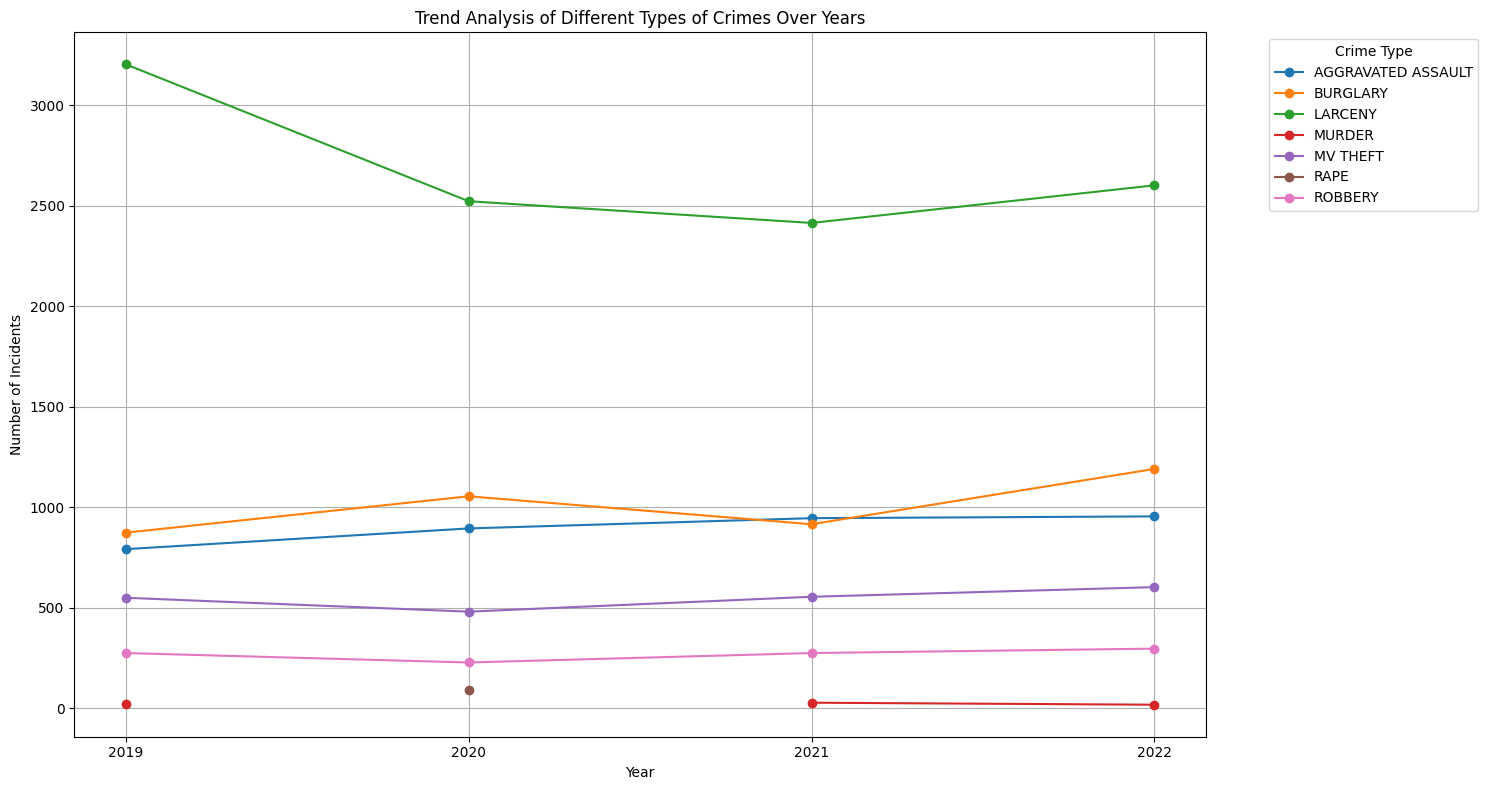

CRIME TYPE  AGGRAVATED ASSAULT  BURGLARY  LARCENY  MURDER  MV THEFT  RAPE  \
YEAR                                                                        
2019                       791       873     3203      19       549     0   
2020                       894      1054     2522       0       480    89   
2021                       945       915     2414      27       554     0   
2022                       954      1190     2601      17       602     0   

CRIME TYPE  ROBBERY  
YEAR                 
2019            274  
2020            227  
2021            274  
2022            296  

Conclusion from the Crime Trend Analysis (2019-2022):

Upon analyzing the crime data from Syracuse for the years 2019 to 2022, a few trends stand out. Aggravated assault incidents have shown a steady increase year over year. Burglary reports also increased, particularly noticeable from 2020 to 2022, hinting at a potential area of concern for local law enforcement. Larceny, while fluctuating, indicates

<Figure size 640x480 with 0 Axes>

In [85]:
#Analysis 1 : Trend Analysis of Crime Over Years at Syracuse from 2019 to 2022 (How has the frequency of different types of crimes (like theft, burglary, assault) changed from 2017 to 2023 in Syracuse?)

import pandas as pd
import matplotlib.pyplot as plt

#  all_crime_data is combined dataframe

# Convert 'CRIME DATE' to datetime format if not already
all_crime_data['CRIME DATE'] = pd.to_datetime(all_crime_data['CRIME DATE'], errors='coerce')

# Extract year from 'CRIME DATE'
all_crime_data['YEAR'] = all_crime_data['CRIME DATE'].dt.year

# Group by 'CRIME TYPE' and 'YEAR' and count occurrences
crime_trends = all_crime_data.groupby(['CRIME TYPE', 'YEAR']).size().reset_index(name='COUNT')

# Pivot the data for easier plotting
pivot_crime_trends = crime_trends.pivot(index='YEAR', columns='CRIME TYPE', values='COUNT')

# Plotting
plt.figure(figsize=(15, 8))  # Adjust the size as needed
pivot_crime_trends.plot(kind='line', marker='o', ax=plt.gca())

plt.title('Trend Analysis of Different Types of Crimes Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(pivot_crime_trends.index)  # Ensuring all years are displayed
plt.grid(True)
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()

# Show plot
plt.show()

# Save plot as an image file (optional)
plt.savefig('crime_trends_over_years.png')

import pandas as pd

# Assuming all_crime_data is your combined dataframe

# Convert 'CRIME DATE' to datetime format if not already
all_crime_data['CRIME DATE'] = pd.to_datetime(all_crime_data['CRIME DATE'], errors='coerce')

# Extract year from 'CRIME DATE'
all_crime_data['YEAR'] = all_crime_data['CRIME DATE'].dt.year

# Group by 'CRIME TYPE' and 'YEAR' and count occurrences
crime_trends = all_crime_data.groupby(['CRIME TYPE', 'YEAR']).size().reset_index(name='COUNT')

# Pivot the data for tabular representation
pivot_crime_trends = crime_trends.pivot(index='YEAR', columns='CRIME TYPE', values='COUNT')

# Fill NaN values with 0 for better readability (assuming no crime means count is 0)
pivot_crime_trends = pivot_crime_trends.fillna(0)

# Convert float counts to integer for clarity
pivot_crime_trends = pivot_crime_trends.astype(int)

# Print the table
print(pivot_crime_trends)

#  Conclusion from the Crime Trend Analysis
conclusion_text = """
Conclusion from the Crime Trend Analysis (2019-2022):

Upon analyzing the crime data from Syracuse for the years 2019 to 2022, a few trends stand out. Aggravated assault incidents have shown a steady increase year over year. Burglary reports also increased, particularly noticeable from 2020 to 2022, hinting at a potential area of concern for local law enforcement. Larceny, while fluctuating, indicates a slight downward trend overall, with the highest number of incidents reported in 2019.

Interestingly, murder incidents showed variations with a notable peak in 2021, which warrants further investigation into the causes behind this rise. Motor vehicle theft has steadily increased each year, reaching its highest in 2022, which could suggest a growing problem in this category. The data for rape seems incomplete or inconsistent, with reports missing for certain years, emphasizing the need for careful interpretation and understanding of data collection methodologies.

The decrease in robbery incidents in 2020 followed by a resurgence in 2021 and 2022 could be correlated with the patterns of social behavior during the COVID-19 pandemic. It is possible that the restrictions in place during 2020 impacted the opportunity for such crimes.

It's crucial to consider that these crime statistics can be influenced by a multitude of factors, including socioeconomic changes, policy amendments, law enforcement practices, and community outreach programs. The observed increases and decreases in certain crime types may also reflect changes in reporting practices or community awareness.

This analysis is subject to the limitations inherent in the data reporting and collection processes, which must be taken into account when drawing conclusions. Nevertheless, these findings provide valuable insights that can inform policy makers, law enforcement, and community leaders in their efforts to improve public safety in Syracuse.
"""

print(conclusion_text)

#Generating an Output file

# Convert 'CRIME DATE' to datetime format if not already
all_crime_data['CRIME DATE'] = pd.to_datetime(all_crime_data['CRIME DATE'], errors='coerce')

# Extract year from 'CRIME DATE'
all_crime_data['YEAR'] = all_crime_data['CRIME DATE'].dt.year

# Group by 'CRIME TYPE' and 'YEAR' and count occurrences
crime_trends = all_crime_data.groupby(['CRIME TYPE', 'YEAR']).size().reset_index(name='COUNT')

# Pivot the data for tabular representation
pivot_crime_trends = crime_trends.pivot(index='YEAR', columns='CRIME TYPE', values='COUNT')

# Fill NaN values with 0 for better readability (assuming no crime means count is 0)
pivot_crime_trends_filled = pivot_crime_trends.fillna(0)

# Convert float counts to integer for clarity
pivot_crime_trends_filled = pivot_crime_trends_filled.astype(int)

# Save the trend analysis data to a CSV file
output_filename = 'trend_analysis_crime_over_years(Outputfile1).csv'
pivot_crime_trends_filled.to_csv(output_filename)


In [86]:
#Analysis 2 : Time Analysis of Crime Incidents (What times of day and days of the week do most crimes occur in Syracuse? Are there patterns in timing for different types of crimes?)

#BASH - pip install tabulate

import pandas as pd
from tabulate import tabulate

# Assuming 'TIME START' and 'CRIME DATE' are columns in the all_crime_data DataFrame

# Convert 'CRIME DATE' to datetime to extract meaningful information
# Extract 'DAY OF WEEK' and 'MONTH' from 'CRIME DATE'
all_crime_data['CRIME DATE'] = pd.to_datetime(all_crime_data['CRIME DATE'])
all_crime_data['DAY OF WEEK'] = all_crime_data['CRIME DATE'].dt.day_name()
all_crime_data['MONTH'] = all_crime_data['CRIME DATE'].dt.month_name()

# Handle incorrect 'TIME START' formats by setting them to NaT (Not a Time)
# and fill NaT values with a default time or drop them based on your analysis needs
all_crime_data['TIME START'] = pd.to_datetime(all_crime_data['TIME START'], format='%H:%M:%S', errors='coerce')


# Extract 'HOUR' from 'TIME START'
# This assumes 'TIME START' has been converted to datetime successfully
all_crime_data['HOUR'] = all_crime_data['TIME START'].dt.hour

# If the hour is NaT because of conversion failure, replace NaT with a default value or drop
# Uncomment the line below to replace NaT with 0, or choose an appropriate default
# all_crime_data['HOUR'].fillna(0, inplace=True)

# Group by 'HOUR' to get the frequency of crimes and sort by the hour for chronological order
hourly_crime_counts = all_crime_data['HOUR'].value_counts().sort_index()

# Group by 'DAY OF WEEK' to get the frequency of crimes
weekly_crime_counts = all_crime_data['DAY OF WEEK'].value_counts()

# Group by 'MONTH' to get the frequency of crimes
monthly_crime_counts = all_crime_data['MONTH'].value_counts()

# Print results in a tabular format with borders using 'tabulate'
print("Crime Counts by Hour of the Day:")
print(tabulate(hourly_crime_counts.reset_index(), headers=['Hour', 'Count'], tablefmt='grid'))

print("\nCrime Counts by Day of the Week:")
print(tabulate(weekly_crime_counts.reset_index(), headers=['Day of the Week', 'Count'], tablefmt='grid'))

print("\nCrime Counts by Month of the Year:")
print(tabulate(monthly_crime_counts.reset_index(), headers=['Month', 'Count'], tablefmt='grid'))

# Conclusion based on the Time Analysis of Crime Incidents data provided

conclusion_text = """
Conclusion from the Time Analysis of Crime Incidents:

The hourly crime data indicates a significant peak at midnight (0 hour), with the number of incidents steadily decreasing towards the early morning. The lowest number of crimes is reported around 5 AM, after which there's a gradual increase throughout the day. A secondary peak is observed around noon (12 PM), suggesting a possible pattern related to activities during lunch hours.

In terms of weekly distribution, crime incidents are fairly evenly distributed across the days, with Tuesday and Monday showing marginally higher counts. The slight variations throughout the week do not indicate a significant skew towards weekend or weekdays.

Looking at the monthly data, August is the month with the highest crime rate, with a steady decrease observed in the colder months, reaching the lowest in February. This seasonal trend suggests that warmer months have higher crime occurrences, which could be related to increased outdoor activity.

These patterns highlight the importance of strategic planning for law enforcement, suggesting that nights and warmer months might benefit from increased patrolling. Additionally, the lack of a strong weekly trend could mean that resource allocation does not need to be significantly varied throughout the week, although the slight increase at the beginning of the workweek could be an area for further investigation.

"""

print(conclusion_text)

#Saving the data in csv file

# Group by 'HOUR' and calculate the frequency of crimes
hourly_crime_counts = all_crime_data['HOUR'].value_counts().sort_index().reset_index()
hourly_crime_counts.columns = ['Time Unit', 'Count']
hourly_crime_counts['Category'] = 'Hourly'

# Group by 'DAY OF WEEK' and calculate the frequency of crimes
weekly_crime_counts = all_crime_data['DAY OF WEEK'].value_counts().reset_index()
weekly_crime_counts.columns = ['Time Unit', 'Count']
weekly_crime_counts['Category'] = 'Weekly'

# Group by 'MONTH' and calculate the frequency of crimes
monthly_crime_counts = all_crime_data['MONTH'].value_counts().reset_index()
monthly_crime_counts.columns = ['Time Unit', 'Count']
monthly_crime_counts['Category'] = 'Monthly'

# Combine all DataFrames into one
combined_crime_data = pd.concat([hourly_crime_counts, weekly_crime_counts, monthly_crime_counts])

# Save the combined data to a CSV file
combined_crime_data.to_csv('combined_crime_data(Outputfile2).csv', index=False)

print("Combined crime data has been saved to 'combined_crime_data.csv'.")

Crime Counts by Hour of the Day:
+----+--------+---------+
|    |   Hour |   Count |
+====+========+=========+
|  0 |      0 |    1250 |
+----+--------+---------+
|  1 |      1 |     739 |
+----+--------+---------+
|  2 |      2 |     724 |
+----+--------+---------+
|  3 |      3 |     626 |
+----+--------+---------+
|  4 |      4 |     530 |
+----+--------+---------+
|  5 |      5 |     407 |
+----+--------+---------+
|  6 |      6 |     448 |
+----+--------+---------+
|  7 |      7 |     467 |
+----+--------+---------+
|  8 |      8 |     679 |
+----+--------+---------+
|  9 |      9 |     796 |
+----+--------+---------+
| 10 |     10 |     828 |
+----+--------+---------+
| 11 |     11 |     898 |
+----+--------+---------+
| 12 |     12 |    1401 |
+----+--------+---------+
| 13 |     13 |     973 |
+----+--------+---------+
| 14 |     14 |    1087 |
+----+--------+---------+
| 15 |     15 |    1161 |
+----+--------+---------+
| 16 |     16 |    1114 |
+----+--------+---------+
| 17 

In [87]:
#Analysis 3 : Correlation between Arrests and Types of Crimes (Is there a correlation between types of crimes committed and the likelihood of an arrest being made?)

import pandas as pd

# Assuming 'ARREST MADE' is a binary column where 'Yes' indicates an arrest was made, and 'No' indicates otherwise.
# Also assuming 'CRIME TYPE' is a column in your all_crime_data DataFrame.

# Convert 'ARREST MADE' to a binary numeric column, 1 if 'Yes', 0 otherwise
all_crime_data['ARREST MADE'] = all_crime_data['ARREST MADE'].map({'Yes': 1, 'No': 0})

# Calculate the total number of crimes and the number of arrests made for each crime type
crime_stats = all_crime_data.groupby('CRIME TYPE').agg({
    'ARREST MADE': ['count', 'sum']
}).reset_index()

# Rename the columns for clarity
crime_stats.columns = ['CRIME TYPE', 'TOTAL CRIMES', 'ARRESTS MADE']

# Calculate the arrest rate for each crime type
crime_stats['ARREST RATE'] = crime_stats['ARRESTS MADE'] / crime_stats['TOTAL CRIMES']

# Sort the crime types by arrest rate
crime_stats_sorted = crime_stats.sort_values(by='ARREST RATE', ascending=False)

# Display the sorted DataFrame
print("Correlation between Arrests and Types of Crimes:")
print(crime_stats_sorted)

# calculate the correlation between total crimes and arrests made
total_crimes_arrests_corr = all_crime_data['ARREST MADE'].corr(all_crime_data['CRIME TYPE'].astype('category').cat.codes)

print("\nCorrelation coefficient between Total Crimes and Arrests Made:")
print(total_crimes_arrests_corr)

# Constructing the conclusion
conclusion = f"""
Conclusion from the Correlation Analysis of Arrests and Types of Crimes:

The analysis of the crime data reveals varying arrest rates for different types of crimes. The highest arrest rate is observed in murder cases (approximately 69.84%), indicating a strong likelihood of arrest following these incidents. Aggravated assault cases also show a relatively high arrest rate of about 55.44%.

On the other hand, crimes such as larceny, motor vehicle theft, and burglary have lower arrest rates, with larceny having the lowest at approximately 16.80%. This suggests that less severe crimes might have a lower priority in arrest procedures or are more challenging to solve.

The correlation coefficient between the total number of crimes and arrests made is -0.1407. This negative correlation, although weak, indicates that as the number of certain types of crimes increases, the proportion of arrests made slightly decreases. This could be due to resource constraints or the nature of these crimes.

"""

print(conclusion)

# Saving the correlation data to a CSV file
output_filename = 'crime_correlation_analysis(OutputFile3).csv'
crime_stats_sorted.to_csv(output_filename, index=False)

# Appending the conclusion to the same file
with open(output_filename, 'a') as f:
    f.write("\n\n")
    f.write("Correlation Coefficient between Total Crimes and Arrests Made:\n")
    f.write(str(total_crimes_arrests_corr))
    f.write("\n\n")
    f.write("Conclusion from the Correlation Analysis of Arrests and Types of Crimes:\n")
    f.write(conclusion)

print(f"Analysis and conclusion saved to {output_filename}")

Correlation between Arrests and Types of Crimes:
           CRIME TYPE  TOTAL CRIMES  ARRESTS MADE  ARREST RATE
3              MURDER            63            44     0.698413
0  AGGRAVATED ASSAULT          3584          1987     0.554408
6             ROBBERY          1071           356     0.332400
5                RAPE            89            17     0.191011
1            BURGLARY          4032           764     0.189484
4            MV THEFT          2185           389     0.178032
2             LARCENY         10740          1804     0.167970

Correlation coefficient between Total Crimes and Arrests Made:
-0.14073091272755892

Conclusion from the Correlation Analysis of Arrests and Types of Crimes:

The analysis of the crime data reveals varying arrest rates for different types of crimes. The highest arrest rate is observed in murder cases (approximately 69.84%), indicating a strong likelihood of arrest following these incidents. Aggravated assault cases also show a relatively high